### World Happiness Report Project

In [1]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\happiness_score_dataset.csv")  ## importing Data
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


### EDA

In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(158, 12)

## Observation
* There is no null value in dataset
* There is no duplicate value in dataset

In [6]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


## Observation
* Theare are no null value in dataset
* No duplicates value in dataset
* mean and median are approximately equal in dataset therefore data is not skewed

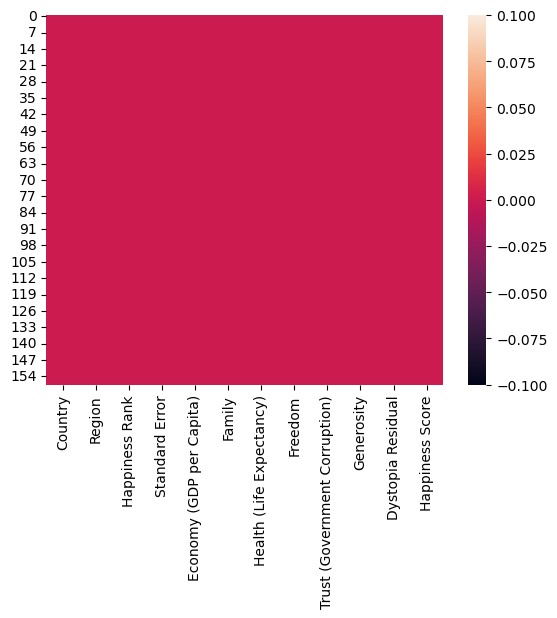

In [7]:
sns.heatmap(df.isnull())
plt.show()

# according to heatmap no null value in dataset

<Axes: >

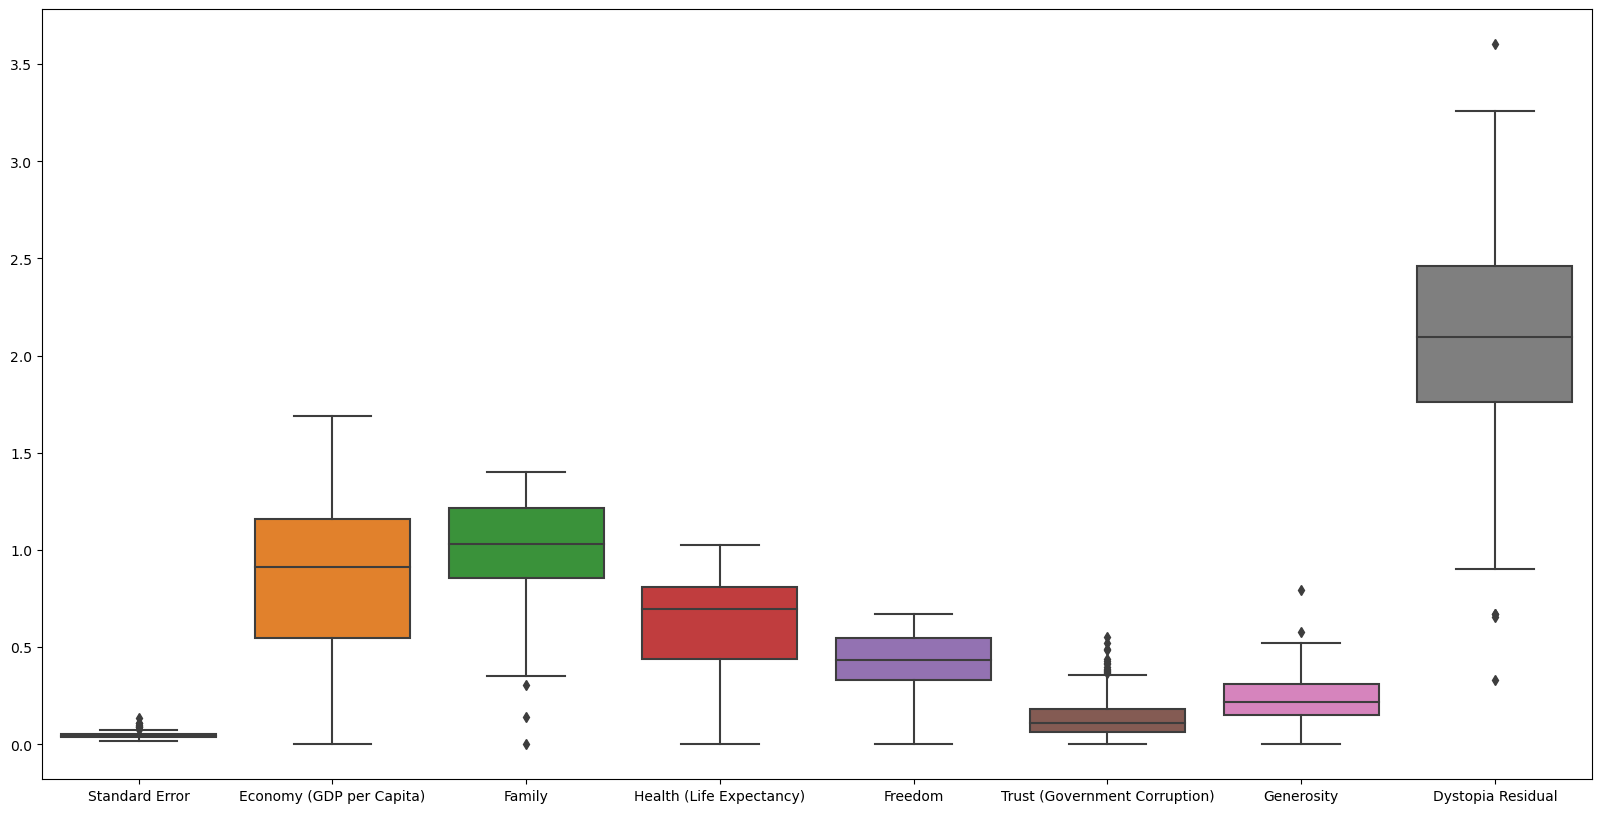

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(df.drop(['Country','Region','Happiness Rank','Happiness Score'],axis=1))

In [9]:
from scipy.stats import zscore
z = np.abs(zscore(df.drop(['Country','Region','Happiness Rank','Happiness Score'],axis=1)))
z.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337


In [10]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))

In [11]:
print(z.iloc[27,5])
print(z.iloc[40,0])

3.1646194851713774
3.5727739331415806


In [12]:
df = df[(z<3).all(axis=1)]
df.shape

(149, 12)

* There are no reletionship between Country and Happiness Score therefore we can drop it
* There are no reletionship between Region and Happiness Score therefore we can drop it
* Happiness Rank is detremine from Happiness Score therefore we can drop it

In [13]:
## feature engineearing
df.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)
df.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


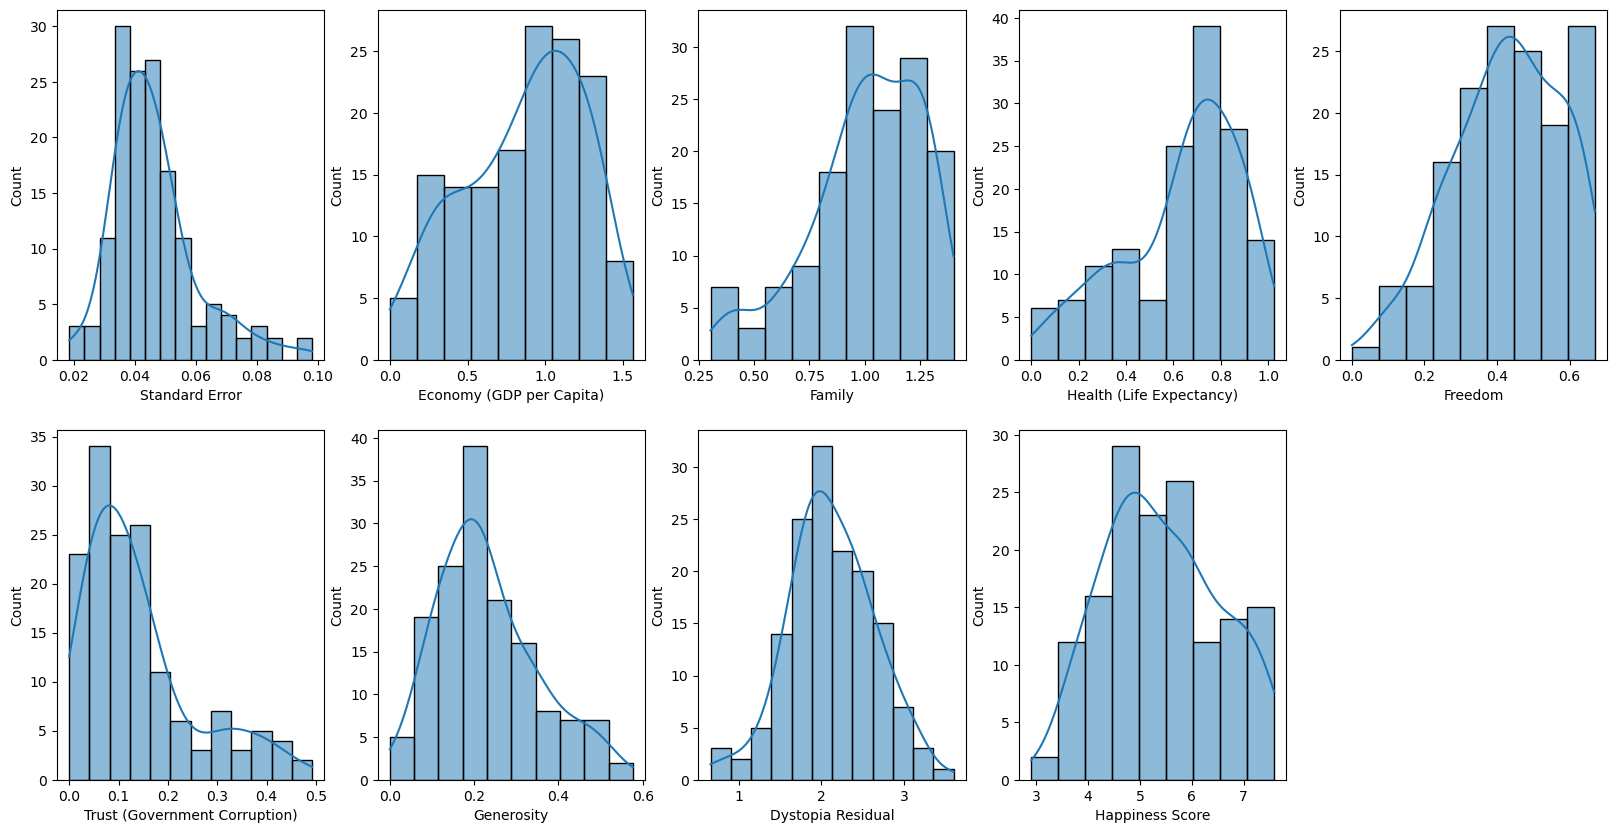

In [14]:
plt.figure(figsize=(20,10))
plot_num =1

for column in df:
    if plot_num<=10:
        ax = plt.subplot(2,5,plot_num)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
    plot_num +=1
plt.show()

In [15]:
x = df.iloc[:,:-1]
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
y = df.iloc[:,-1]
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

### feature selection

In [17]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [18]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [19]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True])

In [20]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 8
feature selected: 7


In [21]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


* Here data are in same scale therefore no need to feature scaling

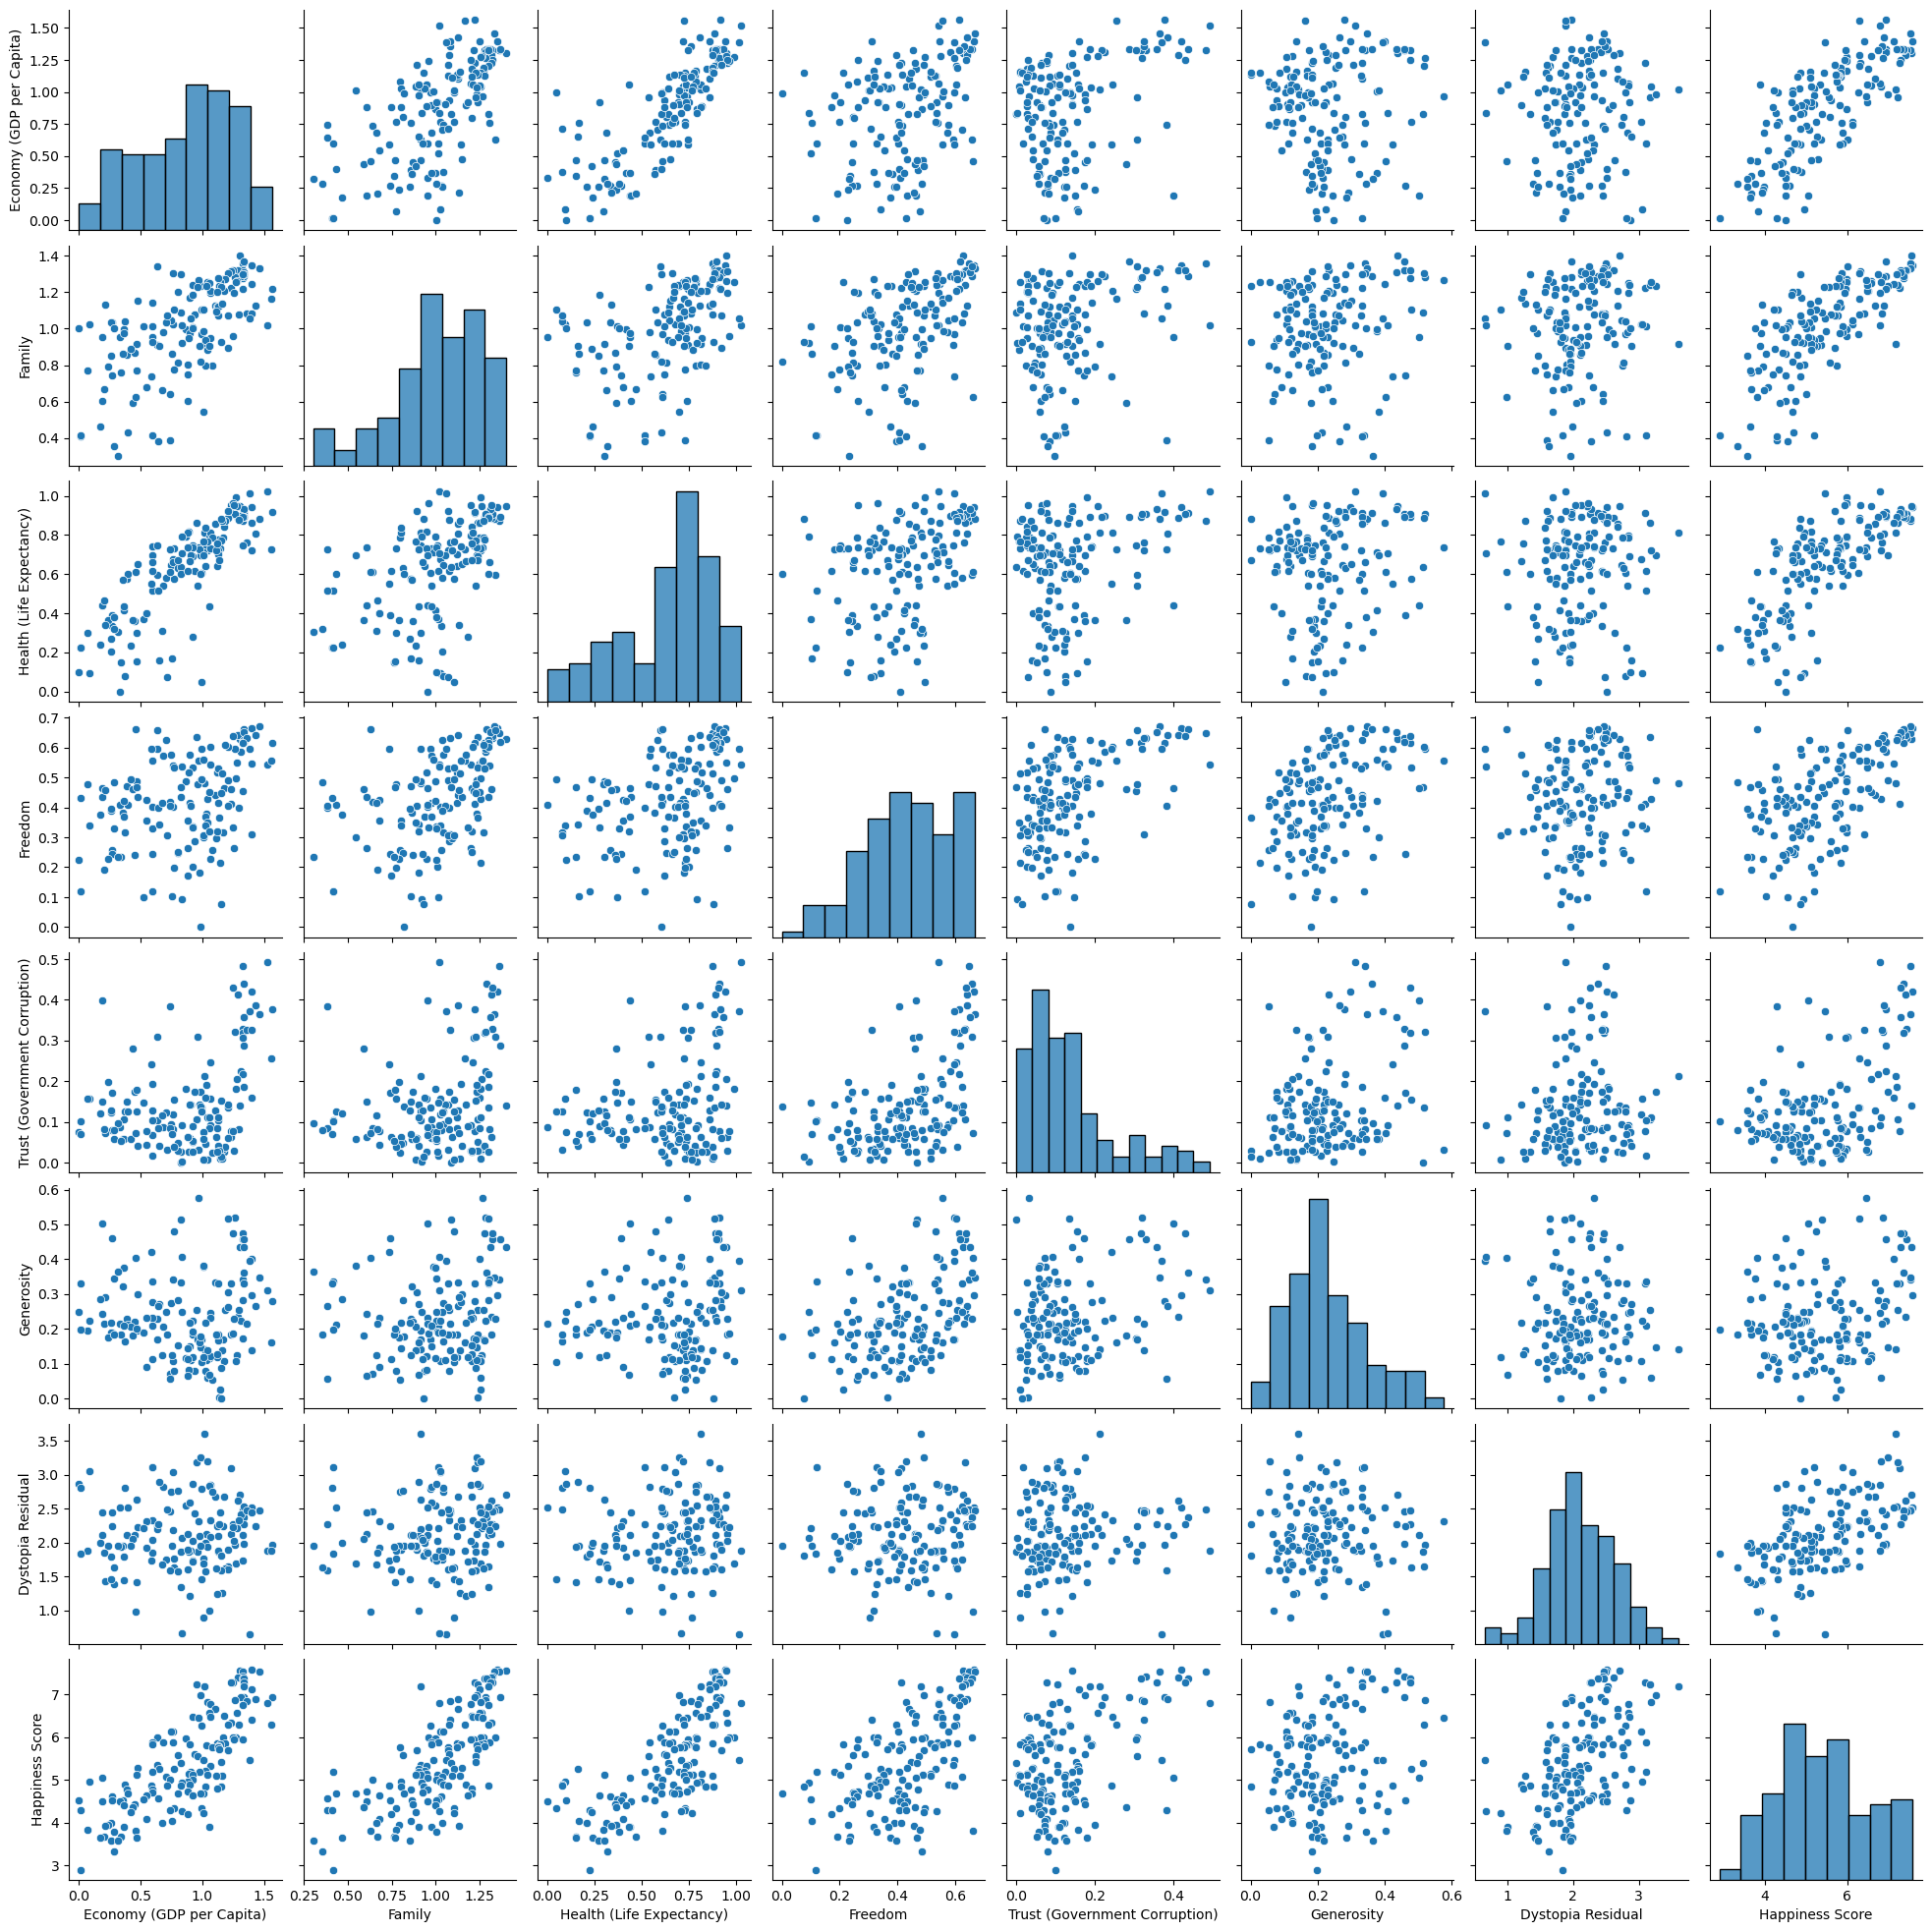

In [22]:
sns.pairplot(df.drop('Standard Error',axis=1))

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (111, 7)
x_test : (38, 7)
y_train : (111,)
y_test : (38,)


In [25]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
models = {
    'lr': LinearRegression(),
    "ridge" : Ridge(),
    'rf': RandomForestRegressor(),
    'svr':SVR()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    # make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(list(models.values())[i])
    #train data confusion metrics
    print("Train Data")
    print('    r2 score:',r2_score(y_train,y_train_pred))
    print("    mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
    print('    mean_squared_error:',mean_squared_error(y_train,y_train_pred))
    print('    root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
    print("*"*40)
    
    #test data confusion metrics
    print("Test Data")
    print('    r2 score:',r2_score(y_test,y_test_pred))
    print("    mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
    print('    mean_squared_error:',mean_squared_error(y_test,y_test_pred))
    print('    root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print("="*70,"\n")
    

LinearRegression()
Train Data
    r2 score: 0.9999999366641281
    mean_absolute_error: 0.00024421046741917137
    mean_squared_error: 7.891169357502003e-08
    root_mean_squared_error: 0.0002809122524473079
****************************************
Test Data
    r2 score: 0.9999999364451129
    mean_absolute_error: 0.00022484286158092935
    mean_squared_error: 7.235267454509348e-08
    root_mean_squared_error: 0.00026898452473161623

Ridge()
Train Data
    r2 score: 0.9958137815057378
    mean_absolute_error: 0.055922650148757067
    mean_squared_error: 0.005215710804747112
    root_mean_squared_error: 0.07221987818285983
****************************************
Test Data
    r2 score: 0.9961431126108753
    mean_absolute_error: 0.053081431748972424
    mean_squared_error: 0.004390789291079845
    root_mean_squared_error: 0.06626303110392585

RandomForestRegressor()
Train Data
    r2 score: 0.9871761098236997
    mean_absolute_error: 0.10075297297297262
    mean_squared_error: 0.01597

### Observetion 
* From above Ridge have best accuracy is 99%  and less mean_squared_error also for train data r2 score and test data r2 score are equle therefore no case of overfitting

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
ridge = Ridge(random_state=42)

In [30]:
pram = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [31]:
ridge_cv = GridSearchCV(estimator=ridge,param_grid=pram,cv=10,scoring='neg_mean_absolute_error')
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [32]:
ridge_cv.best_params_

{'alpha': 0.0001}

In [33]:
y_train_pred = ridge_cv.predict(x_train)
y_test_pred = ridge_cv.predict(x_test)

In [34]:
#train data error
print('r2 score: ',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score:  0.9999999365868898
mean_absolute_error: 0.00024438624414345456
mean_squared_error: 7.900792671190999e-08
root_mean_squared_error: 0.00028108348708508294


In [35]:
##test data error
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.9999999351835186
mean_absolute_error: 0.00022892013351347602
mean_squared_error: 7.378890896133852e-08
root_mean_squared_error: 0.00027164114003835747
